In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
submission_path = '/Users/mansoor/Documents/GSU/Coursework/AML/Project/brist1d/submissions/our_submission.csv'

In [68]:
# Load the training and test datasets
train_path = '/Users/mansoor/Documents/GSU/Coursework/AML/Project/orig-kaggle/train.csv'
test_path = '/Users/mansoor/Documents/GSU/Coursework/AML/Project/orig-kaggle/test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)


In [4]:
train_data.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [5]:
train_data.tail()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
177019,p12_25294,p12,23:35:00,8.8,9.1,9.2,9.4,9.8,10.2,10.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1
177020,p12_25295,p12,23:40:00,9.1,9.2,9.4,9.8,10.2,10.4,10.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9
177021,p12_25296,p12,23:45:00,9.2,9.4,9.8,10.2,10.4,10.3,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7
177022,p12_25297,p12,23:50:00,9.4,9.8,10.2,10.4,10.3,10.1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.5
177023,p12_25298,p12,23:55:00,9.8,10.2,10.4,10.3,10.1,10.0,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2


In [7]:
# Extract the unique feature names by identifying the pattern of the column names
train_columns = train_data.columns

# Use set comprehension to extract unique feature types (such as 'bg', 'insulin', 'carbs', etc.)
unique_features = {col.split('-')[0] for col in train_columns if '-' in col}

# Print the unique feature names
unique_features


{'activity', 'bg', 'cals', 'carbs', 'hr', 'insulin', 'steps'}

In [8]:
print("Training set: ", train_data.shape)

Training set:  (177024, 508)


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [10]:
train_data.isnull().sum()

id                    0
p_num                 0
time                  0
bg-5:55           27254
bg-5:50           18491
                  ...  
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
bg+1:00               0
Length: 508, dtype: int64

In [11]:
#percentage of missing values
train_data.isnull().sum()/train_data.shape[0]*100

id                0.000000
p_num             0.000000
time              0.000000
bg-5:55          15.395653
bg-5:50          10.445476
                   ...    
activity-0:15    98.457271
activity-0:10    98.453882
activity-0:05    98.444844
activity-0:00    98.453882
bg+1:00           0.000000
Length: 508, dtype: float64

In [12]:
#finding duplicates
train_data.duplicated().sum()

np.int64(0)

In [73]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(null_percentage)


          features  null_percent
0               id      0.000000
1            p_num      0.000000
2             time      0.000000
3          bg-5:55     15.395653
4          bg-5:50     10.445476
5          bg-5:45      7.716468
6          bg-5:40     15.397912
7          bg-5:35     10.603082
8          bg-5:30      7.487120
9          bg-5:25     15.399607
10         bg-5:20     10.761818
11         bg-5:15      7.258903
12         bg-5:10     15.395088
13         bg-5:05     10.929027
14         bg-5:00      7.026731
15         bg-4:55     15.390004
16         bg-4:50     11.096236
17         bg-4:45      6.795124
18         bg-4:40     15.378706
19         bg-4:35     11.262315
20         bg-4:30      6.556173
21         bg-4:25     15.367973
22         bg-4:20     11.433478
23         bg-4:15      6.321177
24         bg-4:10     15.361194
25         bg-4:05     11.607466
26         bg-4:00      6.080531
27         bg-3:55     15.351026
28         bg-3:50     11.776369
29        

40294794 862409


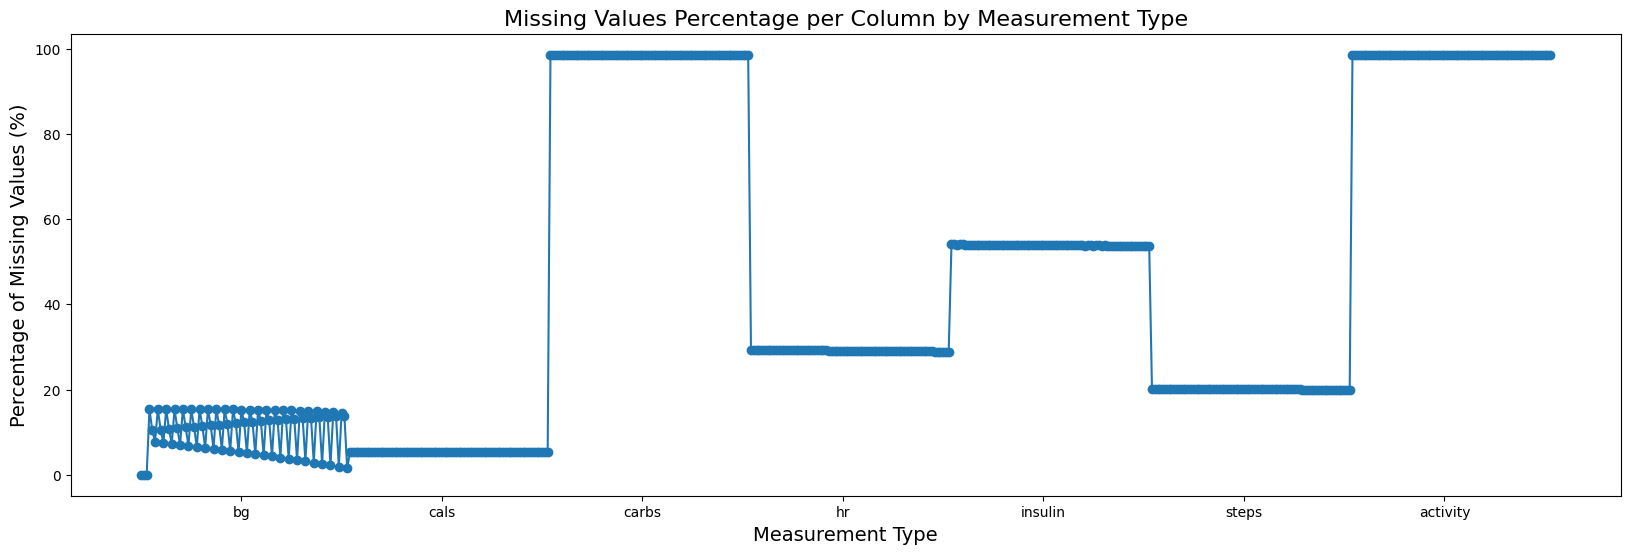

In [56]:
# check the total number of missing values
print(train_data.isnull().sum().sum(), test_data.isnull().sum().sum())

null_percentage = pd.DataFrame(train_data.iloc[:,:-1].isnull().sum()/train_data.iloc[:,:-1].shape[0]*100)
null_percentage = null_percentage.reset_index()
null_percentage.columns=["features", "null_percent"]
#print(null_percentage)
plt.figure(figsize=(20, 6))

plt.plot(null_percentage["features"], null_percentage["null_percent"],  linestyle='-', marker="o")
plt.xticks(np.arange(36,501+36,72), ['bg', 'cals', 'carbs', 'hr', 'insulin', 'steps', "activity"])


# Add labels and title
plt.xlabel('Measurement Type', fontsize=14)
plt.ylabel('Percentage of Missing Values (%)', fontsize=14)
plt.title('Missing Values Percentage per Column by Measurement Type', fontsize=16)

plt.show()

In [ ]:
# Define a function to bin the data into hourly intervals (12 five-minute intervals per hour)
def bin_hourly(data, feature, num_bins=6):
    feature_columns = [col for col in data.columns if feature in col]
    bins = np.array_split(feature_columns, num_bins)  # Split into 6 bins (1 hour each)
    
    binned_data = pd.DataFrame()
    for i, bin_cols in enumerate(bins):
        binned_data[f'{feature}_hour_{i+1}'] = data[bin_cols].mean(axis=1) # take the mean of one hour bin
    
    return binned_data

# Apply the binning to bg, insulin, and carbs features
bg_binned = bin_hourly(train_data, 'bg')
insulin_binned = bin_hourly(train_data, 'insulin')
carbs_binned = bin_hourly(train_data, 'carbs')

# Concatenate all binned features together with the target
aggregated_data = pd.concat([bg_binned, insulin_binned, carbs_binned, train_data['bg+1:00']], axis=1)

# Display the new binned data
print(aggregated_data.head())

   bg_hour_1  bg_hour_2  bg_hour_3  bg_hour_4  bg_hour_5  bg_hour_6  \
0      9.300      8.600     12.400     15.250     17.975      15.90   
1      9.000      9.275     13.175     16.250     17.800      15.16   
2      8.600     10.200     13.775     17.300     17.525      15.02   
3      8.375     11.325     14.425     17.950     17.075      14.40   
4      8.600     12.400     15.250     17.975     16.525      13.64   

   insulin_hour_1  insulin_hour_2  insulin_hour_3  insulin_hour_4  \
0          0.0083          0.0083        0.008300        0.016633   
1          0.0083          0.0083        0.008300        0.029133   
2          0.0083          0.0083        0.008300        0.041633   
3          0.0083          0.0083        0.008300        0.054133   
4          0.0083          0.0083        0.016633        0.058300   

   insulin_hour_5  insulin_hour_6  carbs_hour_1  carbs_hour_2  carbs_hour_3  \
0        0.058300        0.055533           NaN           NaN           NaN   


In [69]:
# remove the activity column
train_data = train_data.loc[:, ~train_data.columns.str.startswith('activity-')]
train_data.drop(["id", "p_num", "time"], axis=1, inplace=True)

print("Columns after removing 'activity':", train_data.columns)

Columns after removing 'activity': Index(['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30',
       'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10',
       ...
       'cals-0:40', 'cals-0:35', 'cals-0:30', 'cals-0:25', 'cals-0:20',
       'cals-0:15', 'cals-0:10', 'cals-0:05', 'cals-0:00', 'bg+1:00'],
      dtype='object', length=433)


In [16]:
test_data = test_data.loc[:, ~test_data.columns.str.startswith('activity-')]
test_data_ids = test_data.loc[:, 'id']
test_data = test_data.loc[:, ~test_data.columns.str.startswith('id')]
test_data = test_data.loc[:, ~test_data.columns.str.startswith('p_num')]
test_data = test_data.loc[:, ~test_data.columns.str.startswith('time')]
print("Columns after removing 'activity':", test_data.columns)

Columns after removing 'activity': Index(['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30',
       'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10',
       ...
       'cals-0:45', 'cals-0:40', 'cals-0:35', 'cals-0:30', 'cals-0:25',
       'cals-0:20', 'cals-0:15', 'cals-0:10', 'cals-0:05', 'cals-0:00'],
      dtype='object', length=432)


# dealing with the missing values

In [ ]:
# 1. fill the missing values in each column with the mean/mode of the feature
train_filled = train_data.fillna(train_data.mean())
test_filled = test_data.fillna(test_data.mean())
print(f"Missing values in the training data: {train_filled.isnull().sum().sum()}, test data: {test_filled.isnull().sum().sum()}")
print(train_data.shape, test_data.shape)


Missing values in the training data: 0, test data: 0
(177024, 433)


(177024, 163)
                   0
bg-5:55    15.395653
bg-5:50    10.445476
bg-5:45     7.716468
bg-5:40    15.397912
bg-5:35    10.603082
...              ...
cals-0:20  19.936280
cals-0:15  19.931196
cals-0:10  19.925547
cals-0:05  19.919898
cals-0:00  19.916508

[162 rows x 1 columns]


<Figure size 2000x600 with 0 Axes>

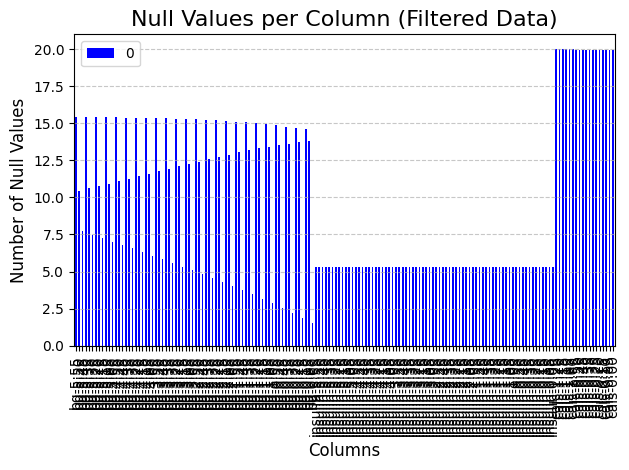

In [52]:
threshold = 0.2 * train_data.shape[0]

filtered_data = train_data.loc[:, train_data.isnull().sum() < threshold]

null_percentage = pd.DataFrame(filtered_data.iloc[:,:-1].isnull().sum()/filtered_data.iloc[:,:-1].shape[0]*100)
# null_percentage = null_percentage.reset_index()
# null_percentage.columns=["features", "null_percent"]
print(filtered_data.shape)
print(null_percentage)

plt.figure(figsize=(20, 6))
null_percentage.plot(kind='bar', color='blue')  
plt.title('Null Values per Column (Filtered Data)', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)


# plt.xticks(
#     range(len(null_percentage)),  
#     [label if i % 10 == 0 else '' for i, label in enumerate(null_percentage.index)],  
#     rotation=90,
#     ha='center',
#     fontsize=10
# )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_filled.iloc[:, :-1]
Y= train_filled.loc[:, 'bg+1:00']
print(X.shape,Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test,y_pred)
print(f'MSE: {mse}')

(177024, 432) (177024,)
(141619, 432) (141619,)
(35405, 432) (35405,)
MSE: 4.413910964714362


In [74]:
y_pred_test = model.predict(test_filled).round(3)
print(y_pred_test, test_data_ids)

[5.636 1.067 5.305 ... 4.731 5.784 4.32 ] 0       p01_8459
1       p01_8460
2       p01_8461
3       p01_8462
4       p01_8463
          ...   
3639     p24_256
3640     p24_257
3641     p24_258
3642     p24_259
3643     p24_260
Name: id, Length: 3644, dtype: object


In [75]:
submission = pd.DataFrame([test_data_ids, y_pred_test]).transpose()
submission.columns = ["id", "bg+1:00"]
print(submission)
submission.to_csv(submission_path, index=False)

            id bg+1:00
0     p01_8459   5.636
1     p01_8460   1.067
2     p01_8461   5.305
3     p01_8462   7.195
4     p01_8463   3.553
...        ...     ...
3639   p24_256   3.954
3640   p24_257   8.295
3641   p24_258   4.731
3642   p24_259   5.784
3643   p24_260    4.32

[3644 rows x 2 columns]
